**Importing Libraries.**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

**Imporing dataset from google drive by mounting google drive.:(Read the data)**

In [4]:
df=pd.read_csv('/content/drive/MyDrive/Data sets/Admission_Predict.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


**column--- less than 10 unique values in numb--- categorical**

In [5]:
df["SOP"].value_counts()

,count
SOP,
4.0,70
3.5,70
3.0,64
4.5,53
2.5,47
5.0,37
2.0,33
1.5,20
1.0,6


**Checking the list of coloumns in the Data Set.**

In [6]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

**Using value.counts for unique values in specific coloumn.**

In [7]:
df["LOR "].value_counts()

,count
LOR,
3.0,85
4.0,77
3.5,73
4.5,45
2.5,39
2.0,38
5.0,35
1.5,7
1.0,1


**Check whether there are empty rows or not and thier datatype.**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


**Using value-Counts function on research Column.**

In [9]:
df["Research"].value_counts()

,count
Research,
1,219
0,181


##Function To be Performed on Data-Set.

- Drop serial number column
-describe
-missing values
-duplicates
-outliers
-distrubution
-data inconsist
-visualisations
-corelations
-linearity( LR)
-encoding?
-stand/ normalisation

**Using Describe() function to see descriptive statistics of a DataFrame.**

In [10]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


**Droping  the serial number column , axis =1 denotes coloumn.**

In [11]:
df.drop(["Serial No."], axis=1, inplace=True)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


**Checking  Missing values in the Data-Set.**

In [12]:
df.isnull().sum()

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


**Observation : There are no Missing values.**

**Chekcing  for duplicates in Data-Set.**

In [13]:
df.duplicated().sum()

np.int64(0)

**Check for outliers in whole data-Set using Boxplot.**

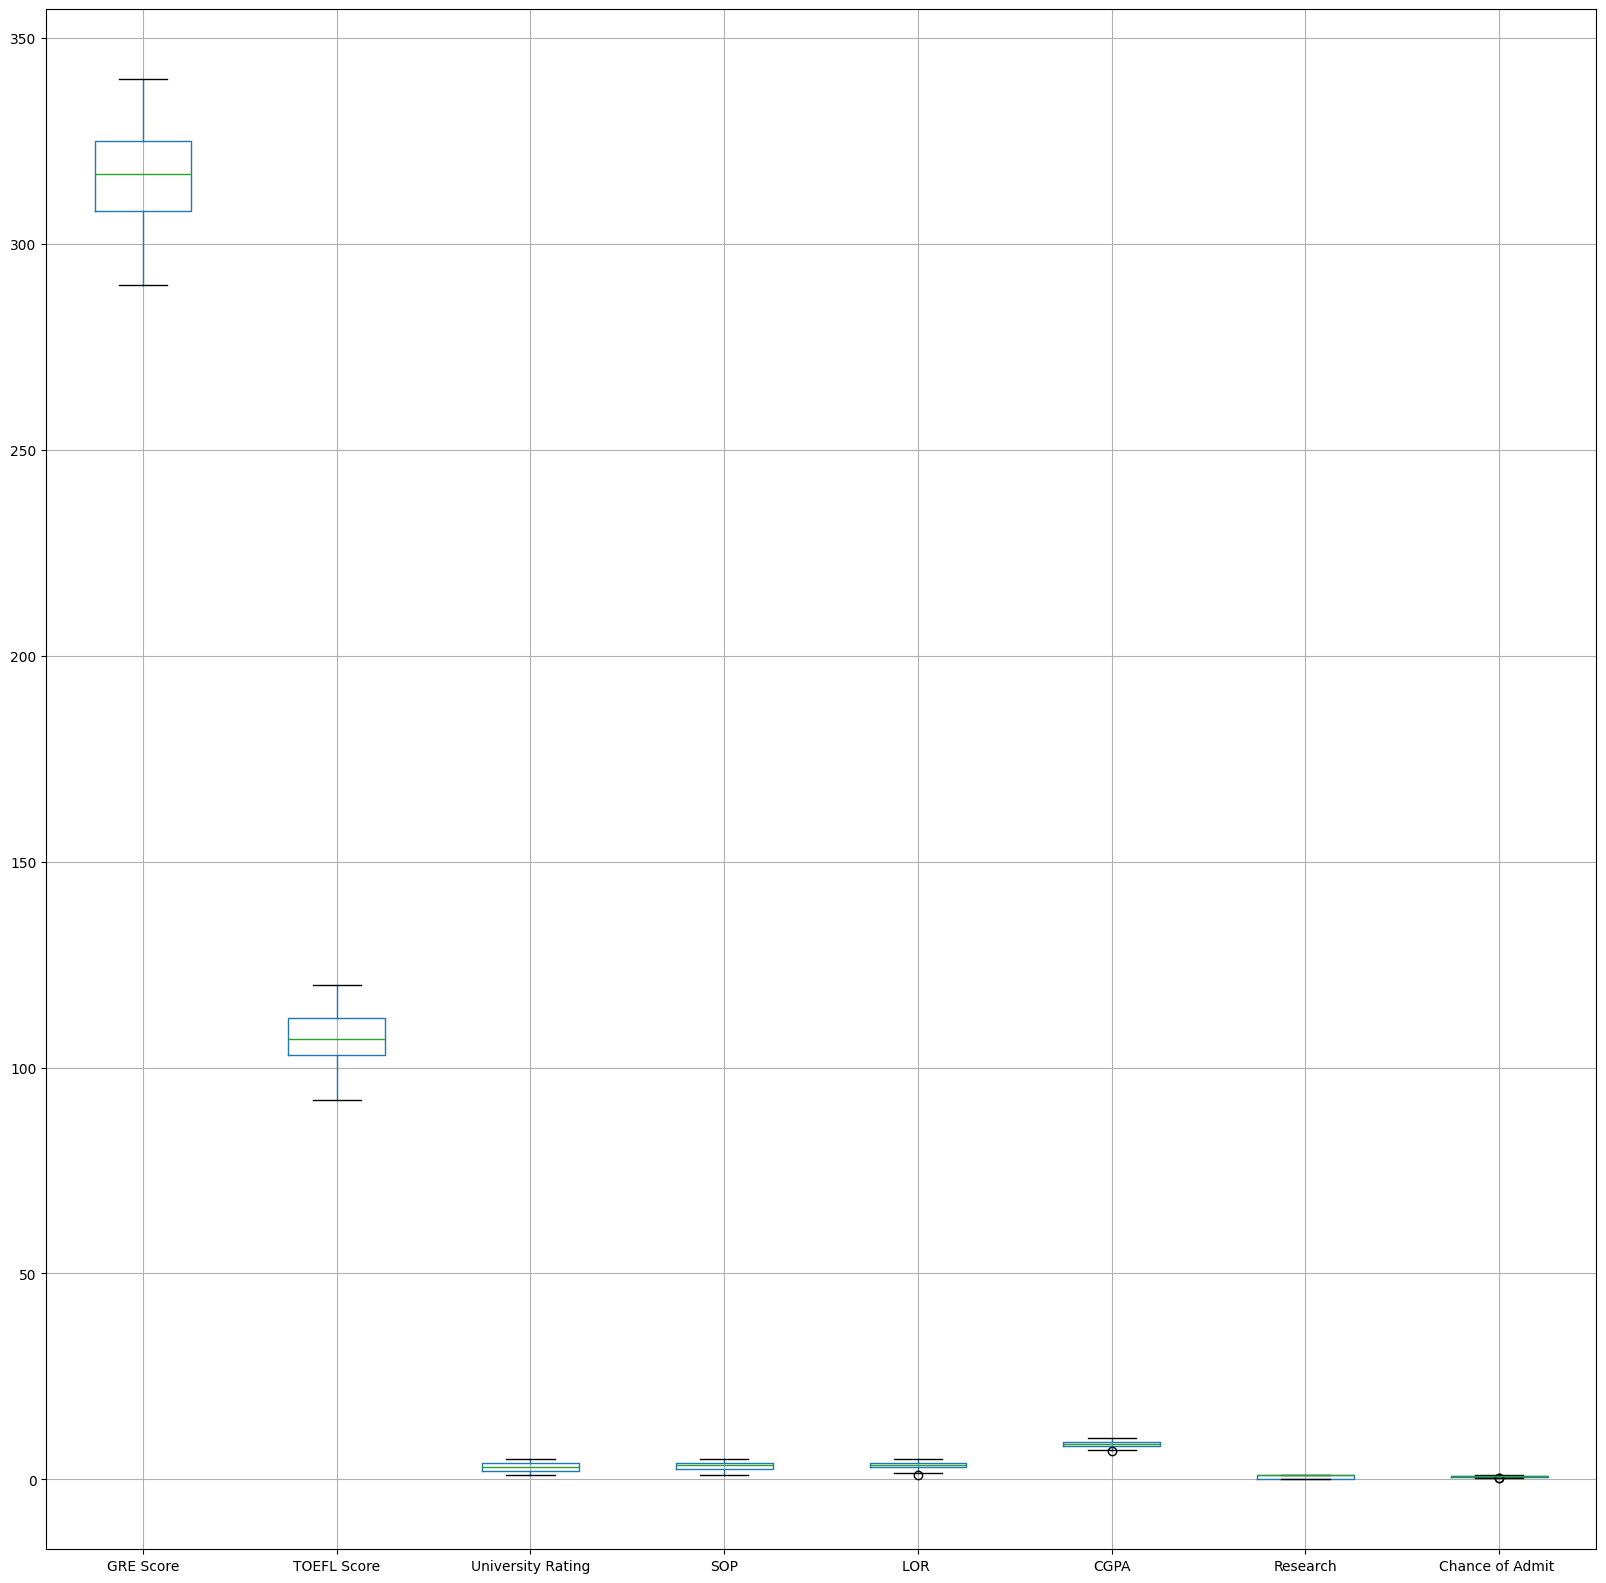

In [14]:
df.boxplot(figsize=(20,20))
plt.show()

**Using Box-Plot for quick way to visualize the distribution of data and identify potential outliers within each numerical column of  DataFrame.**

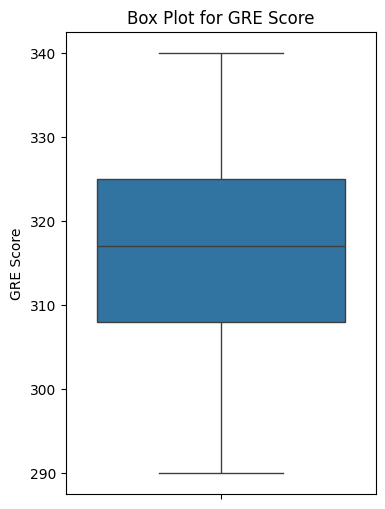

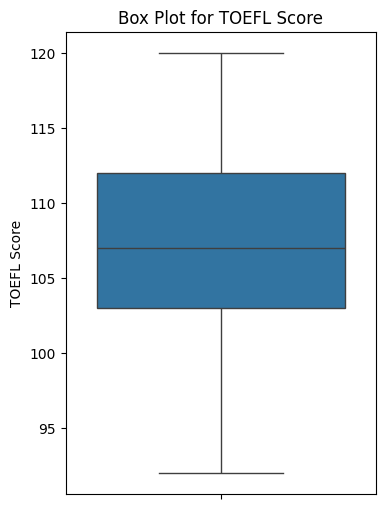

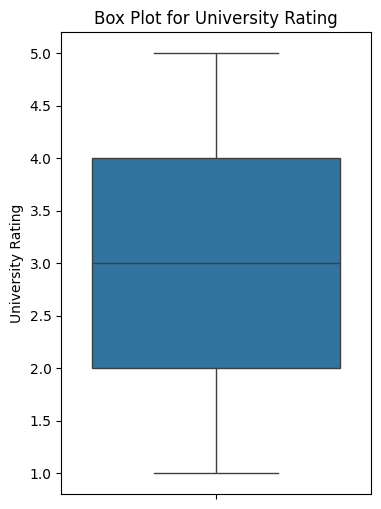

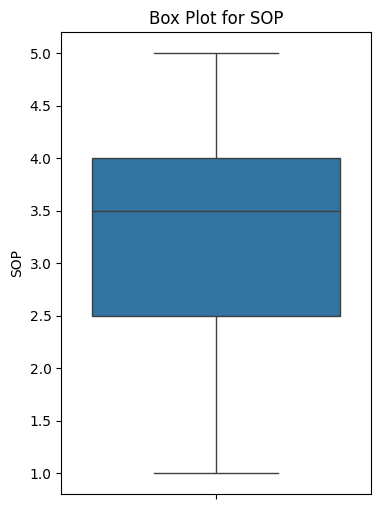

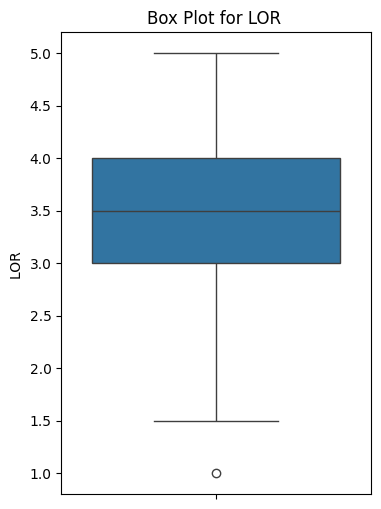

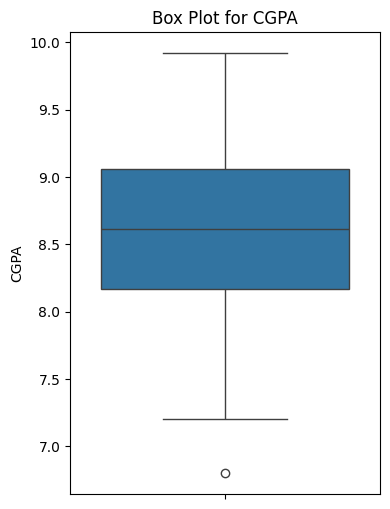

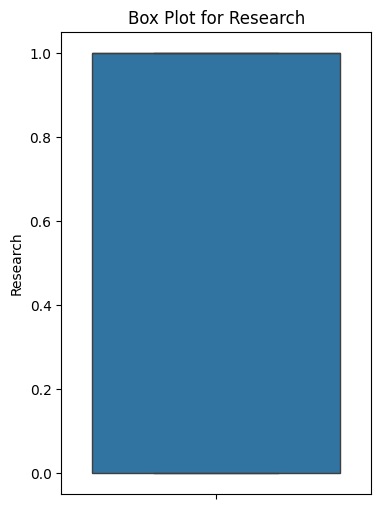

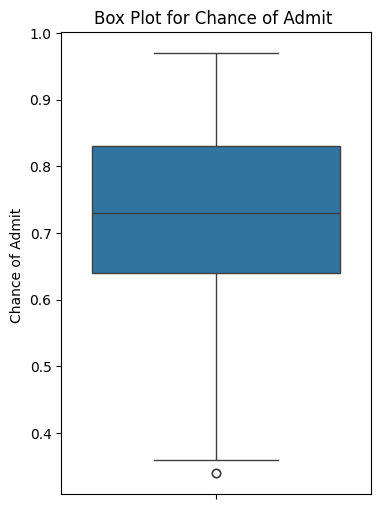

In [15]:
for col in df.columns:
    plt.figure(figsize=(4, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot for {col}')
    plt.ylabel(col)
    plt.show()

**After Performing drop and Other fuction again checking columns.**

In [16]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

**Checking the row with 1 lor**

In [17]:
df[df["LOR "] == 1]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
347,299,94,1,1.0,1.0,7.34,0,0.42


 **Check row with less than 7 cgpa.**

In [18]:
df[df["CGPA"] < 7]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
58,300,99,1,3.0,2.0,6.8,1,0.36


##NOW Data Inconsistencies phase start.

**SOp and LOR are categorical or continueous.**
sop 1-5
lor 1-5
min -1
max-5

In [19]:
df["SOP"].unique()

array([4.5, 4. , 3. , 3.5, 2. , 5. , 1.5, 1. , 2.5])

**Using value_counts function SOP.**

In [20]:
df["SOP"].value_counts()

,count
SOP,
4.0,70
3.5,70
3.0,64
4.5,53
2.5,47
5.0,37
2.0,33
1.5,20
1.0,6


**Check for Unique value in LOR.**

In [21]:
df["LOR "].unique()

array([4.5, 3.5, 2.5, 3. , 4. , 1.5, 2. , 5. , 1. ])

**Data inconsistencies in Categorical columns.**

In [22]:
print(df["Research"].unique())
print(df["University Rating"].unique())

[1 0]
[4 3 2 5 1]


**Distribution of numerical variable.**

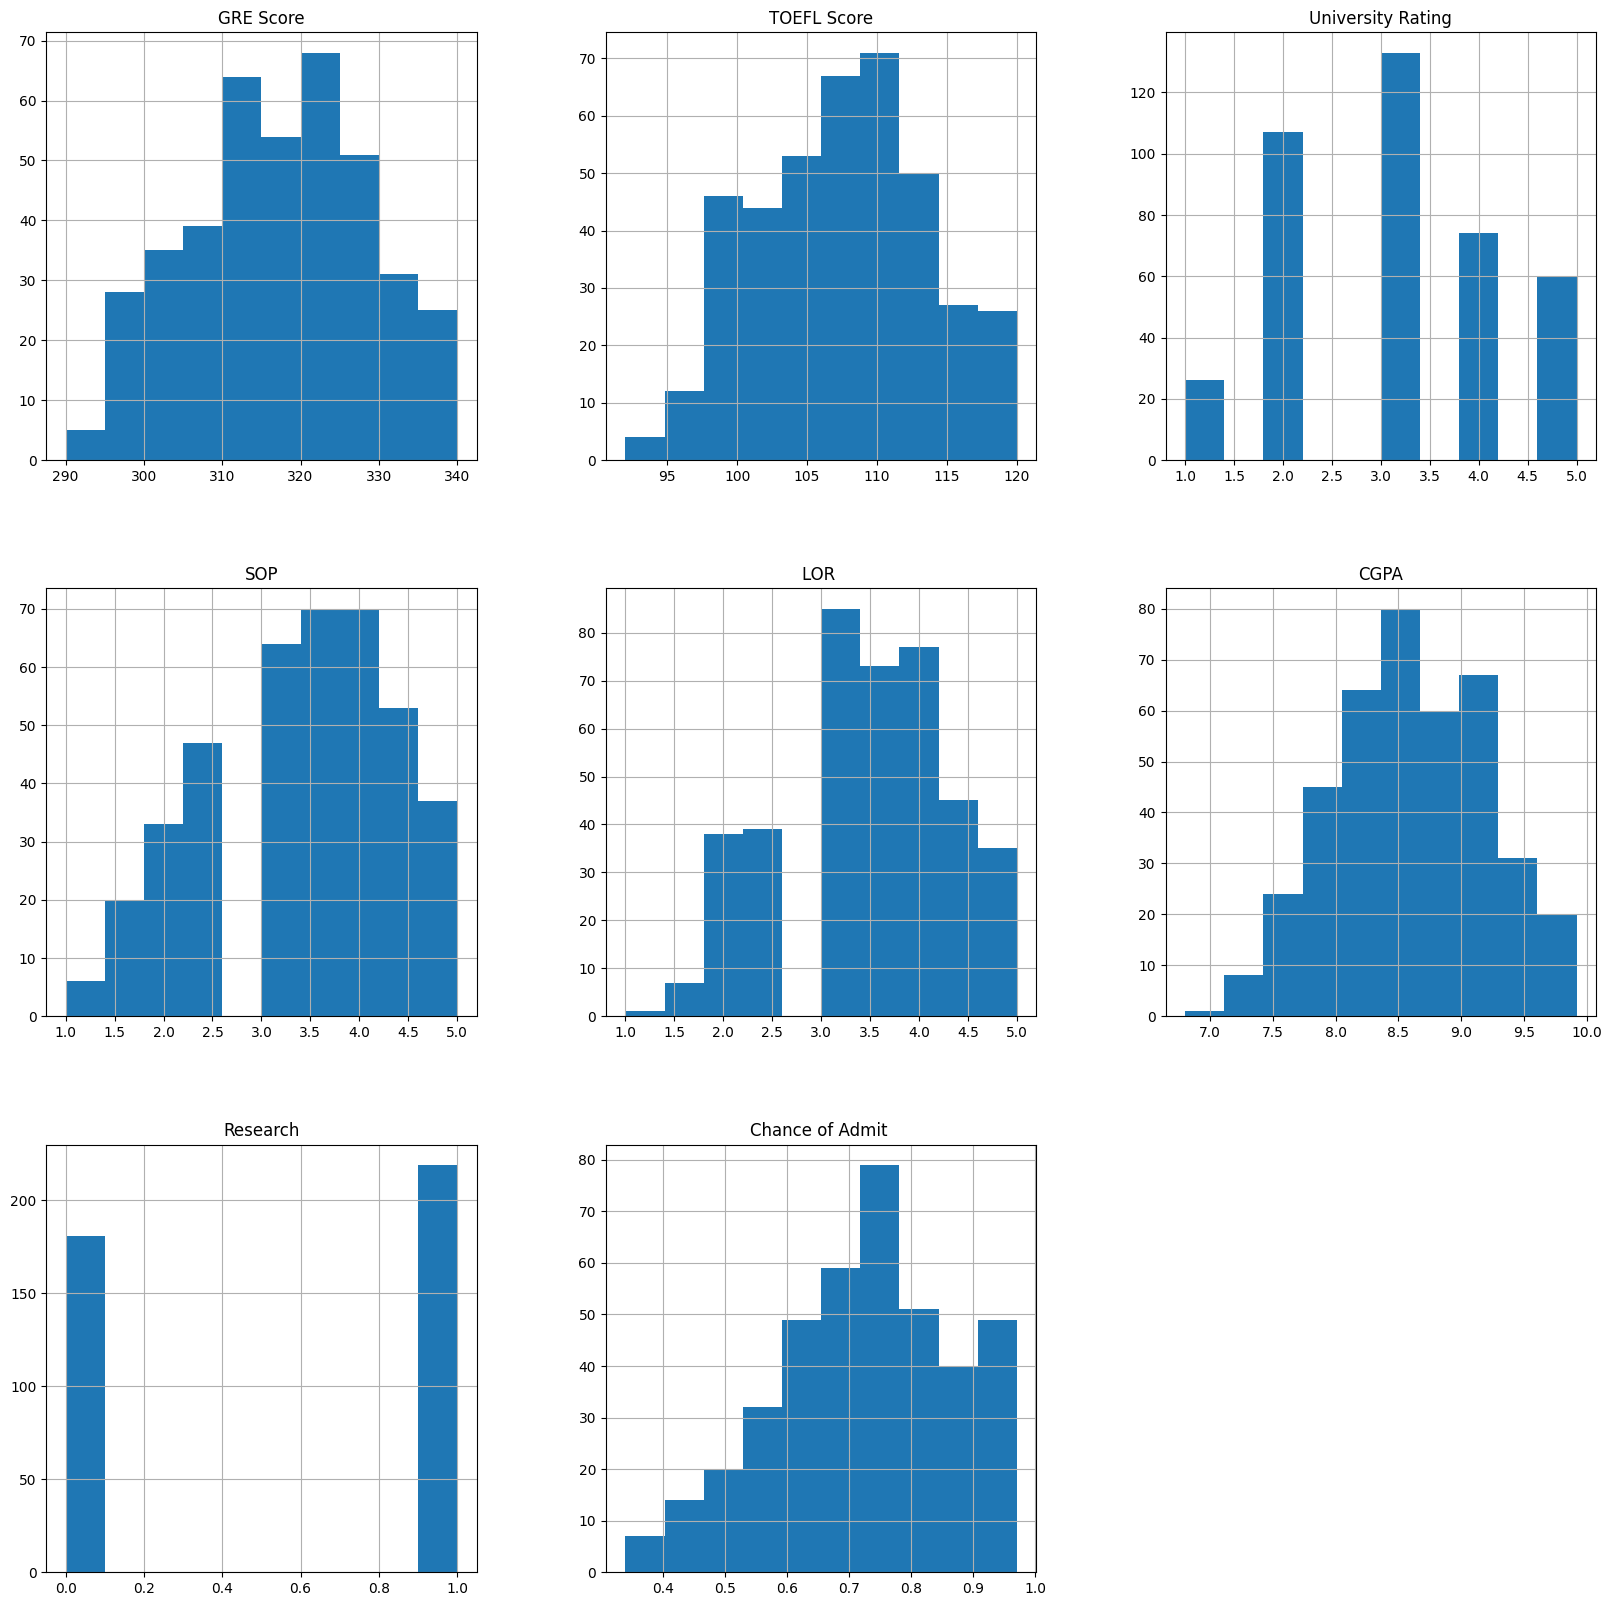

In [23]:
df.hist(figsize=(20,20))
plt.show()

**linearity with chances of admission**

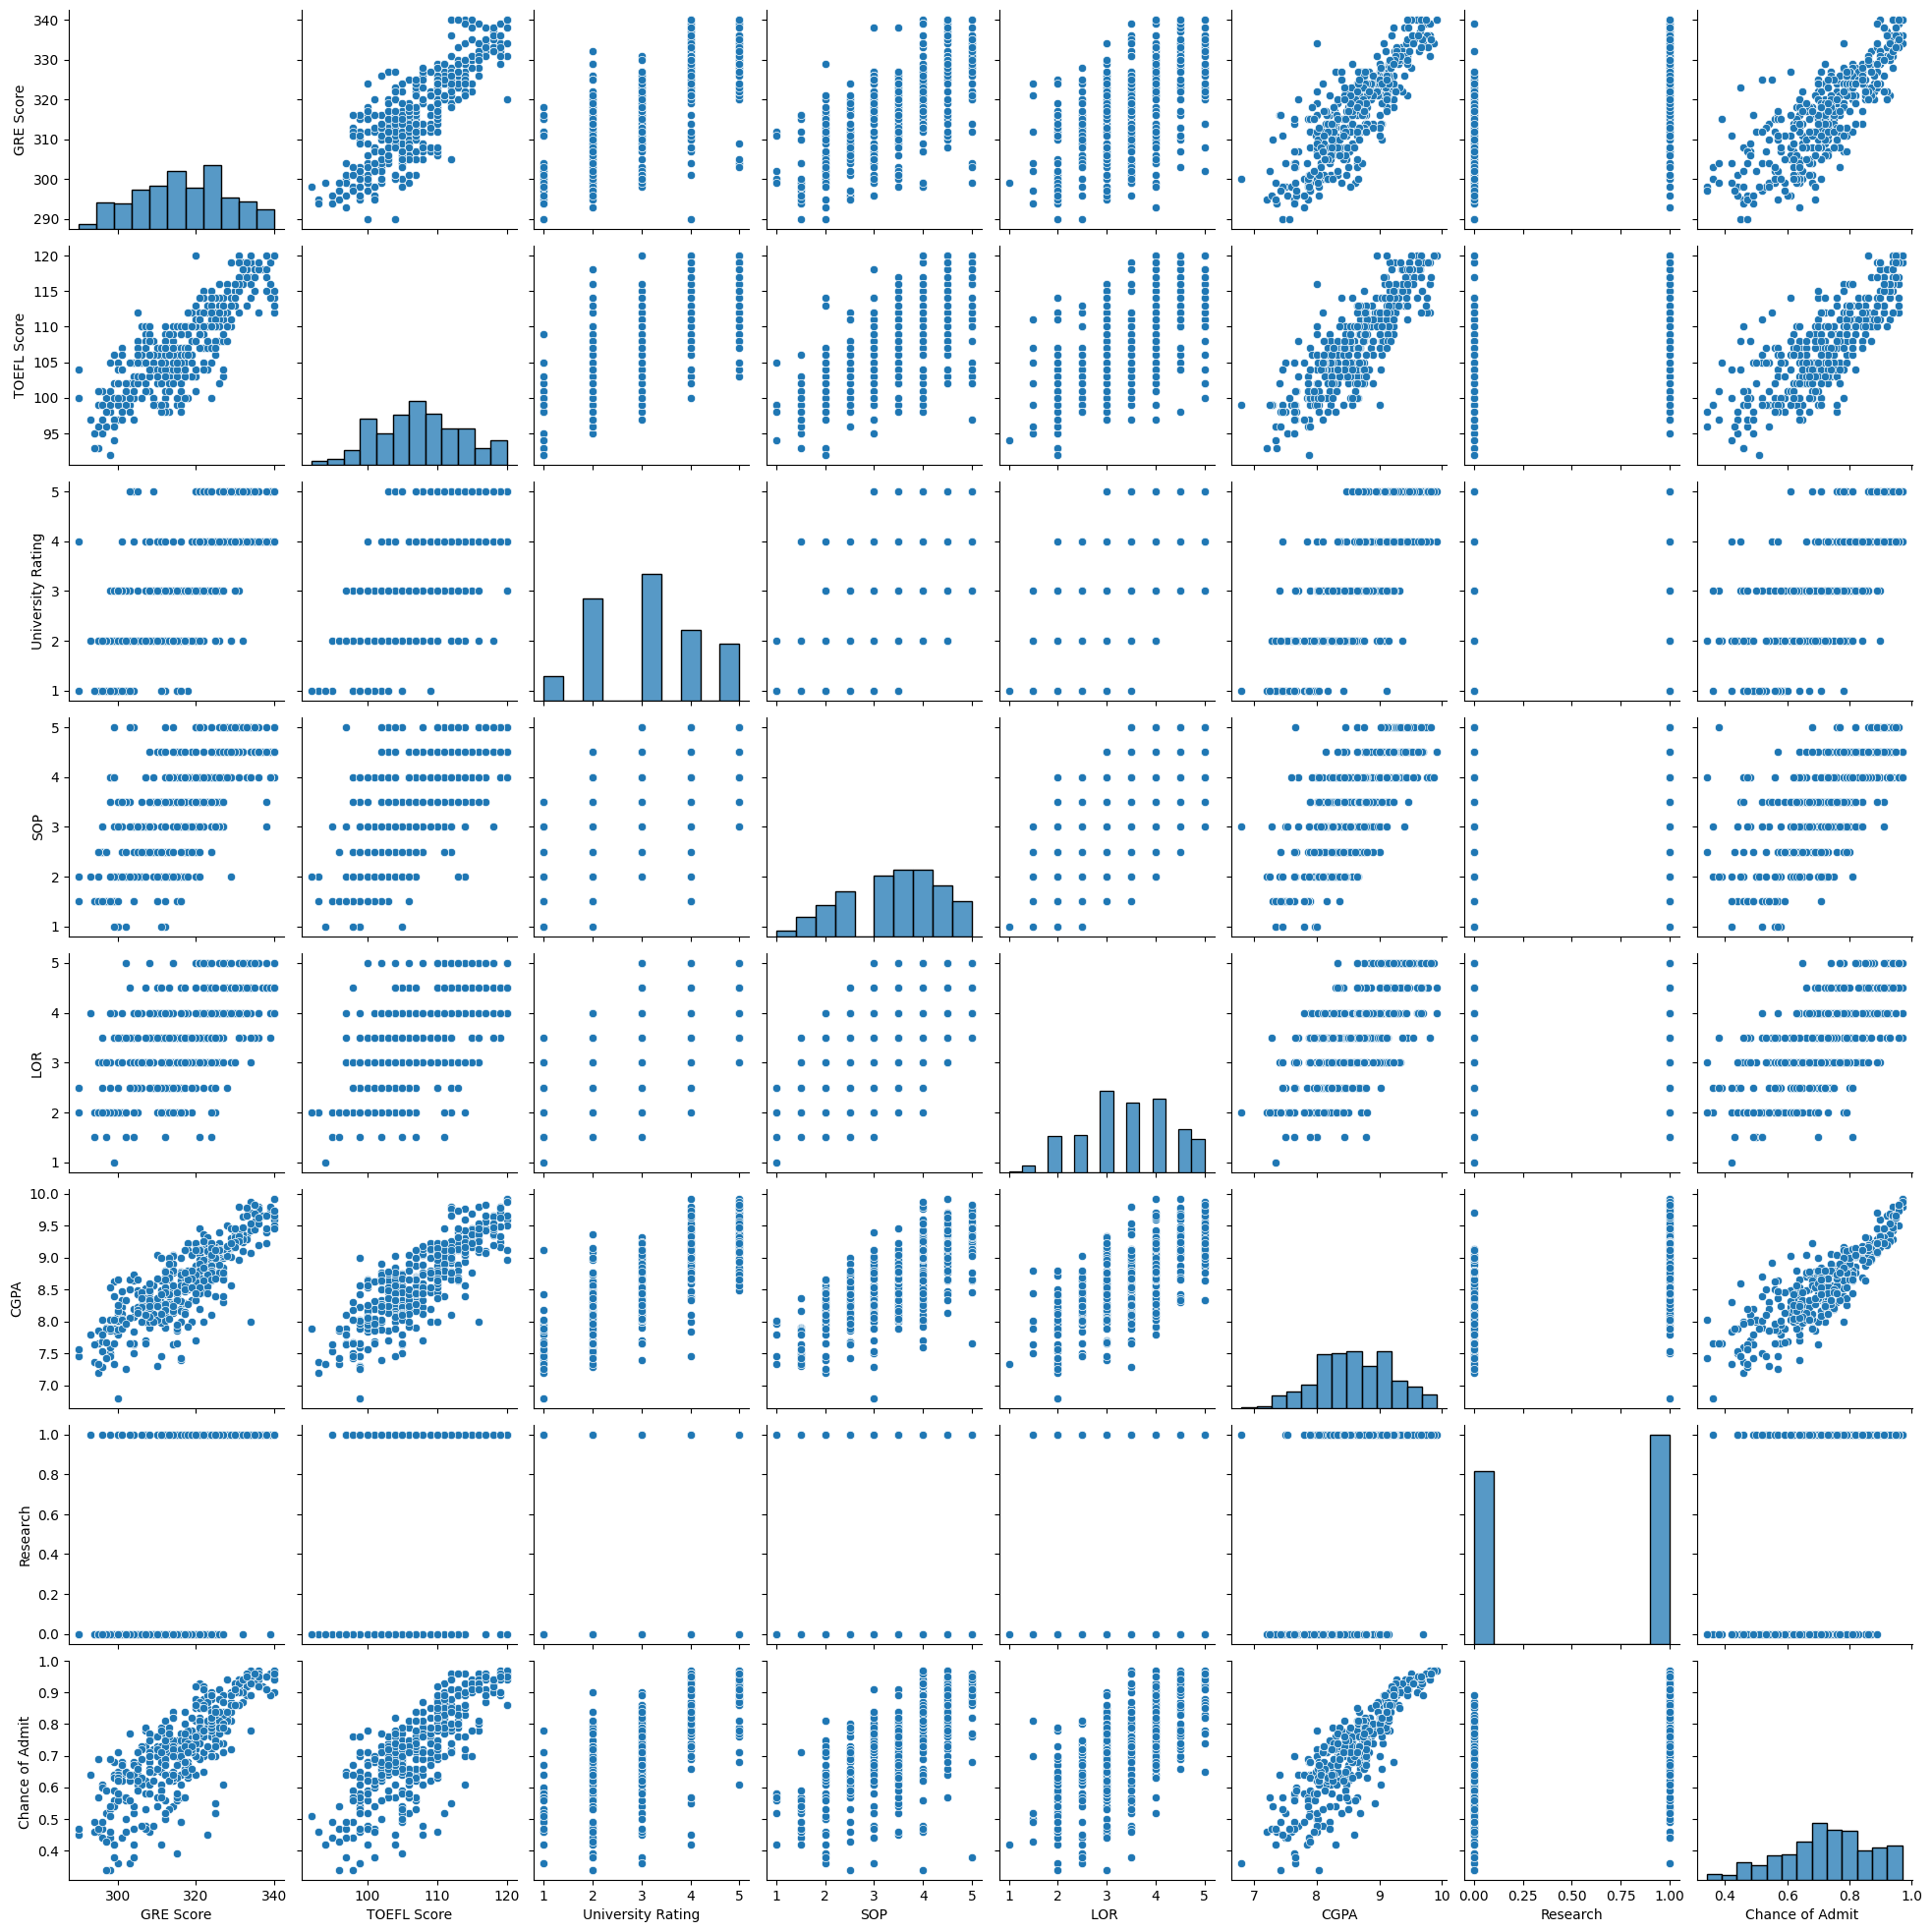

In [24]:
sns.pairplot(df)
plt.show()

**Scatter plot**

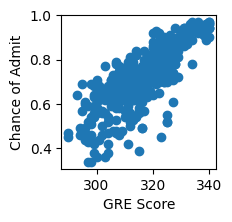

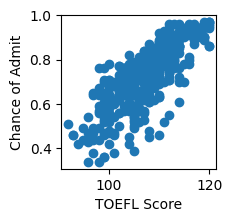

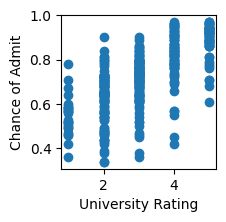

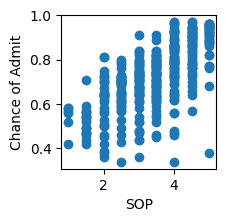

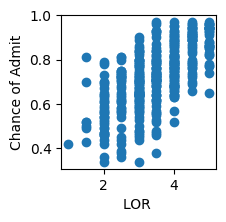

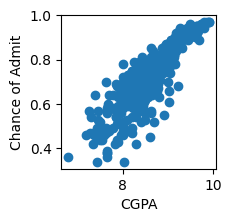

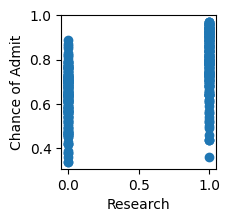

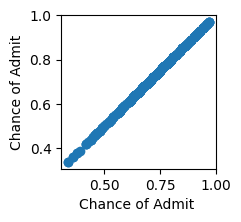

In [25]:
for a in df.columns:
  plt.figure(figsize=(2,2))
  plt.scatter(df[a], df["Chance of Admit "])
  plt.xlabel(a)
  plt.ylabel("Chance of Admit")
  plt.show()

**Observations: Tofel, gre, cgpa are highly linear with output( chances Of admissions)**

**Heat map of the data**

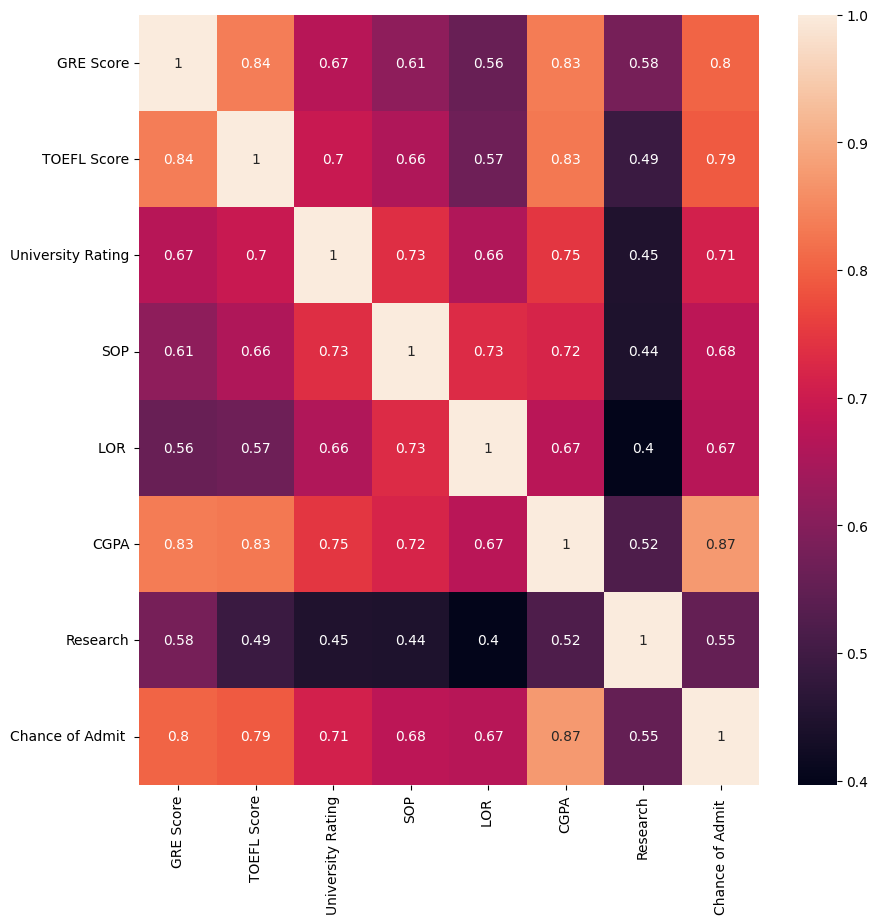

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

**Oservations:** CGPA, GRE and TOFL are highly corelated with o/p

many columns highlhy multicolinear!--- LR a good choice?-- NO

try for DT and RF.  

In [28]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


**Scaling of all data except chance of admission**

**Normalisation**

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled[0]

array([0.94      , 0.92857143, 0.75      , 0.875     , 0.875     ,
       0.91346154, 1.        , 0.92063492])

Convert the response to df

In [30]:
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)
df_scaled

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,0.920635
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,0.666667
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,0.603175
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0,0.730159
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,0.492063
...,...,...,...,...,...,...,...,...
395,0.68,0.642857,0.50,0.625,0.625,0.717949,1.0,0.761905
396,0.70,0.535714,0.50,0.500,0.625,0.740385,1.0,0.793651
397,0.80,0.857143,0.75,1.000,0.875,0.849359,1.0,0.904762
398,0.44,0.392857,0.50,0.625,0.750,0.634615,0.0,0.523810


**Historgram of scaled data.**

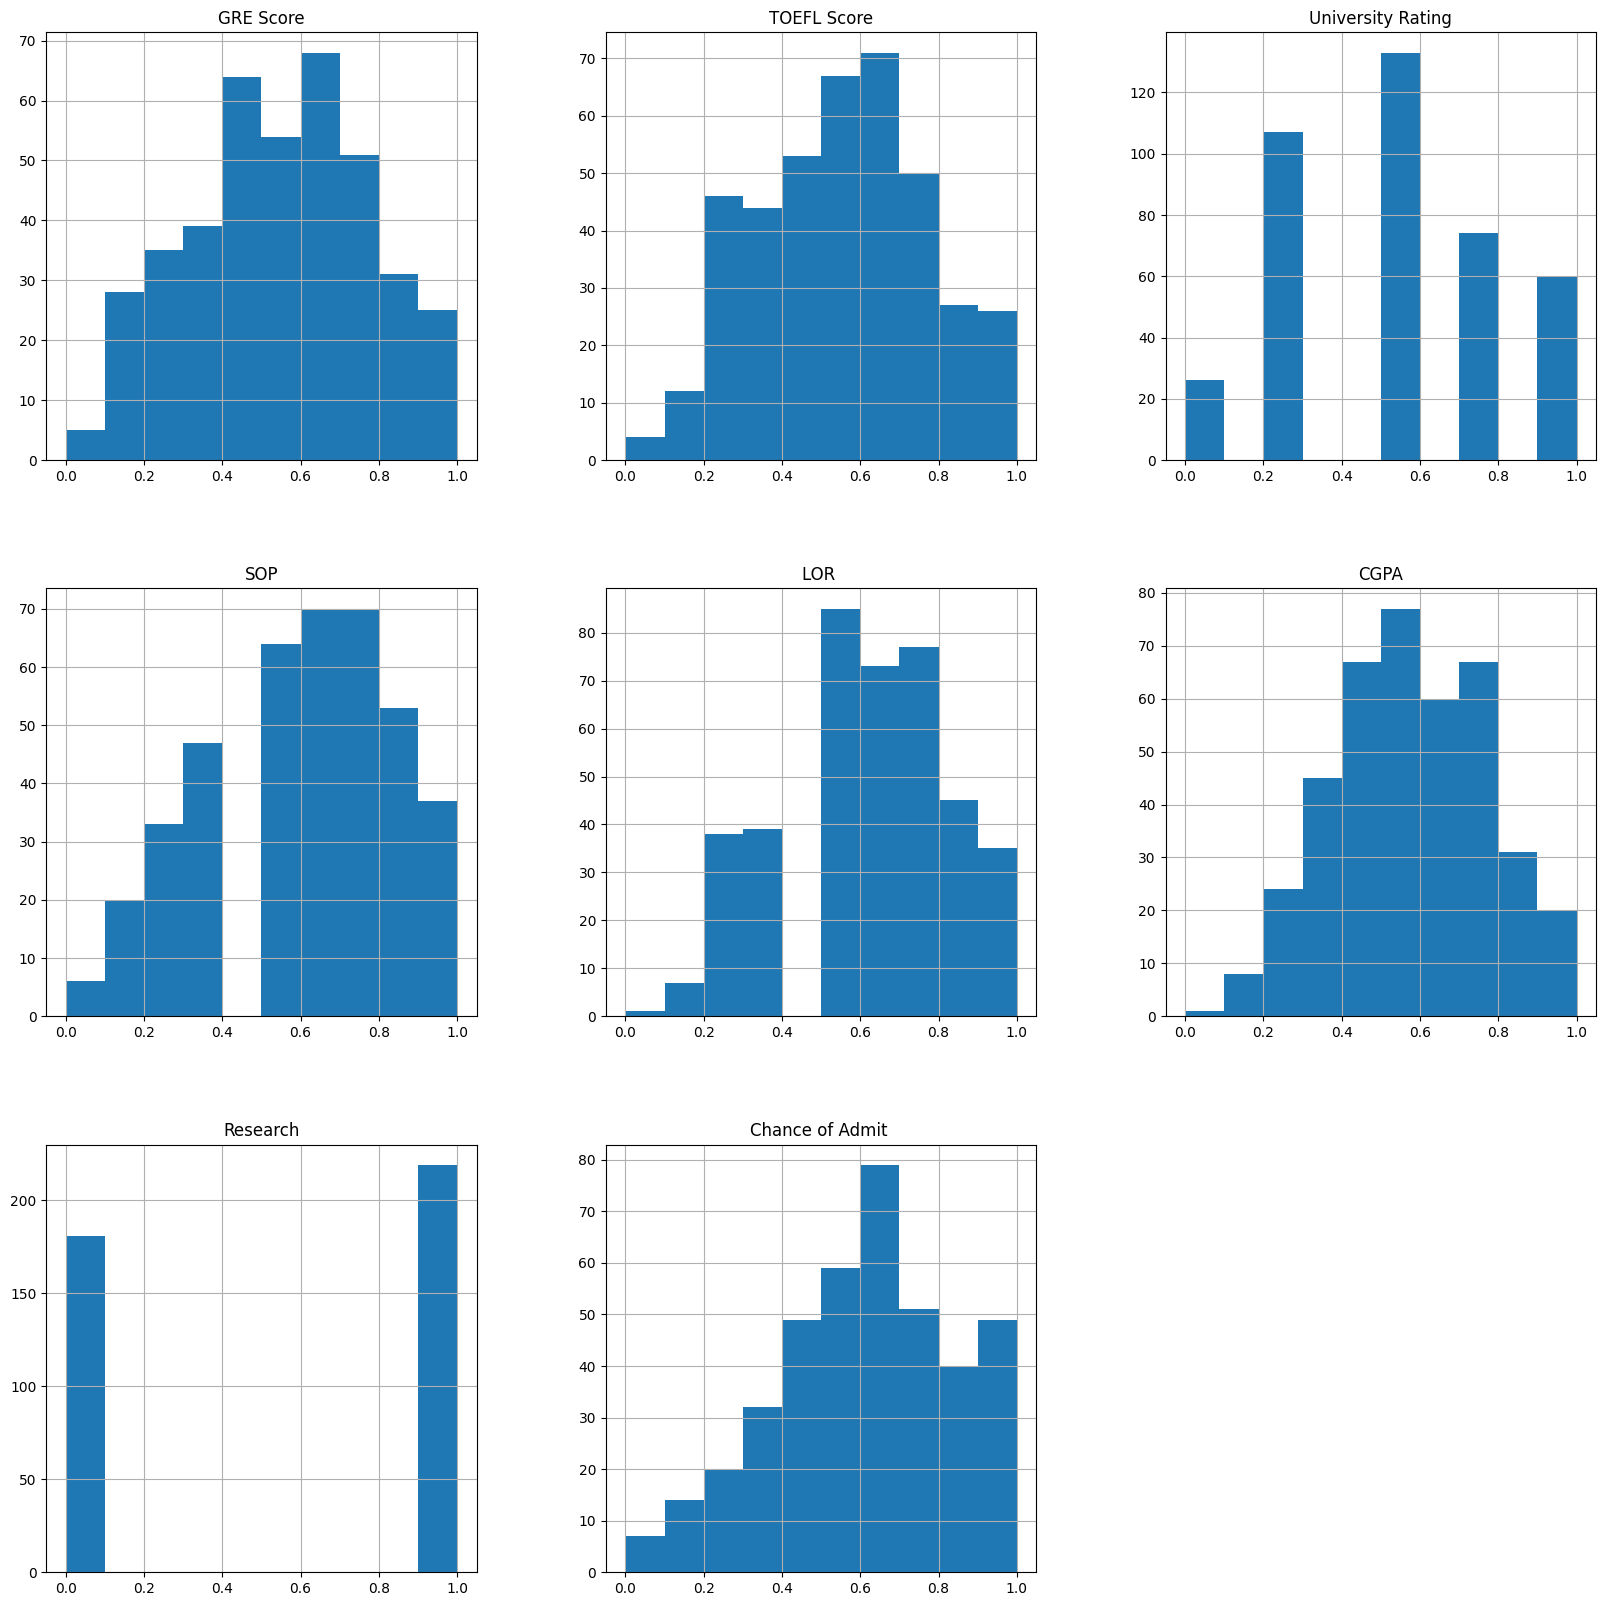

In [31]:
df_scaled.hist(figsize=(20,20))
plt.show()

**Z score normalisation/ standardisation--- shape of the data -- sclae data**

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit(df)
df_scaled

StandardScaler()

In [33]:
df_scaled

StandardScaler()

**Sklearn library**

In [34]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()

In [35]:
print(df.CGPA.values.shape)
print(df["Chance of Admit "].values.shape)

# Reshape
x = df.drop(["Chance of Admit "], axis=1)
print("Before resphape:\nX:", x.shape)
y = df["Chance of Admit "].values.reshape(-1,1)
print("After resphape:\nX:", x.shape)
print("Y:", y.shape)

(400,)
(400,)
Before resphape:
X: (400, 7)
After resphape:
X: (400, 7)
Y: (400, 1)


**Now, we can use above x&y axises on the fit operation of the linear regression model.**

In [36]:
linear_reg.fit(x,y)

LinearRegression()

<a id="11"></a> <br>
**1.1. Prediction**

We will predict the values according to linear_reg model.

<a id="12"></a> <br>
**1.2. R Square (LR)**

We can evaluate the linear regression model performance with R Square.
* y: Chance of Admit values
* y_head: predicted Chance of Admit value

First, we must be sure that y and y_head values are using the same number of samples. If not, we will get an error like this:

ValueError: Found input variables with inconsistent numbers of samples: [500, 312]

**Training and testing split(400- 320 training & 80- testing) **

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [38]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
3,322,110,3,3.5,2.5,8.67,1
18,318,110,3,4.0,3.0,8.80,0
202,340,120,5,4.5,4.5,9.91,1
250,320,104,3,3.0,2.5,8.57,1
274,315,100,1,2.0,2.5,7.95,0
...,...,...,...,...,...,...,...
71,336,112,5,5.0,5.0,9.76,1
106,329,111,4,4.5,4.5,9.18,1
270,306,105,2,2.5,3.0,8.22,1
348,302,99,1,2.0,2.0,7.25,0


In [39]:
x_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
209,301,104,3,3.5,4.0,8.12,1
280,311,102,3,4.5,4.0,8.64,1
33,340,114,5,4.0,4.0,9.60,1
210,325,108,4,4.5,4.0,9.06,1
93,301,97,2,3.0,3.0,7.88,1
...,...,...,...,...,...,...,...
246,316,105,3,3.0,3.5,8.73,0
227,312,110,2,3.5,3.0,8.53,0
369,301,98,1,2.0,3.0,8.03,1
176,329,119,4,4.5,4.5,9.16,1


In [40]:
y_train

array([[0.8 ],
       [0.63],
       [0.97],
       [0.74],
       [0.58],
       [0.56],
       [0.8 ],
       [0.66],
       [0.93],
       [0.64],
       [0.64],
       [0.83],
       [0.47],
       [0.76],
       [0.71],
       [0.66],
       [0.79],
       [0.78],
       [0.59],
       [0.72],
       [0.71],
       [0.61],
       [0.66],
       [0.61],
       [0.79],
       [0.68],
       [0.62],
       [0.71],
       [0.73],
       [0.62],
       [0.77],
       [0.53],
       [0.56],
       [0.46],
       [0.86],
       [0.48],
       [0.46],
       [0.93],
       [0.74],
       [0.8 ],
       [0.65],
       [0.68],
       [0.65],
       [0.42],
       [0.97],
       [0.85],
       [0.73],
       [0.75],
       [0.64],
       [0.81],
       [0.84],
       [0.81],
       [0.77],
       [0.82],
       [0.71],
       [0.77],
       [0.82],
       [0.71],
       [0.84],
       [0.8 ],
       [0.64],
       [0.78],
       [0.56],
       [0.77],
       [0.73],
       [0.94],
       [0.

In [41]:
y_test

array([[0.68],
       [0.68],
       [0.9 ],
       [0.79],
       [0.44],
       [0.94],
       [0.43],
       [0.36],
       [0.72],
       [0.85],
       [0.45],
       [0.93],
       [0.64],
       [0.93],
       [0.71],
       [0.53],
       [0.66],
       [0.34],
       [0.74],
       [0.96],
       [0.64],
       [0.54],
       [0.71],
       [0.54],
       [0.92],
       [0.84],
       [0.59],
       [0.61],
       [0.7 ],
       [0.74],
       [0.82],
       [0.94],
       [0.71],
       [0.46],
       [0.69],
       [0.56],
       [0.72],
       [0.58],
       [0.61],
       [0.9 ],
       [0.73],
       [0.64],
       [0.74],
       [0.94],
       [0.92],
       [0.82],
       [0.96],
       [0.71],
       [0.94],
       [0.89],
       [0.86],
       [0.73],
       [0.81],
       [0.94],
       [0.39],
       [0.48],
       [0.71],
       [0.86],
       [0.65],
       [0.86],
       [0.57],
       [0.61],
       [0.79],
       [0.44],
       [0.64],
       [0.74],
       [0.

**Creat the model and fit the x&y values**

In [42]:
multiple_linear_regression = LinearRegression()
multiple_linear_regression.fit(x_train,y_train)

LinearRegression()

Test my algo

In [43]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = multiple_linear_regression.predict(x_test) #testing- unknown

print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 0.004617003377285005
RMSE: 0.06794853476922813
MAE: 0.047956733620911976
R² Score: 0.8212082591486993


**Overfitting and Unfitting**

In [45]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred_training = multiple_linear_regression.predict(x_train) #testing- unknown
print("R² training Score:", r2_score(y_train, y_pred_training))
print("R² test Score:", r2_score(y_test, y_pred))


R² training Score: 0.7951946003191086
R² test Score: 0.8212082591486993


**GRE Score,	TOEFL Score,	University Rating,	SOP,	LOR,	CGPA,	Research.**

In [44]:
import numpy as np
c=np.array([.5,.3,.58,.68,.98,.78,1]).reshape(1, -1)
b=multiple_linear_regression.predict(c)
b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[-1.0972817]])

**Decision Tree Library**

In [46]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [47]:
y_head_dtr = tree_reg.predict(x_test)
y_head_dtr

array([0.62, 0.73, 0.93, 0.84, 0.34, 0.91, 0.59, 0.38, 0.7 , 0.91, 0.79,
       0.93, 0.49, 0.88, 0.76, 0.75, 0.69, 0.44, 0.67, 0.97, 0.62, 0.67,
       0.66, 0.56, 0.95, 0.76, 0.71, 0.67, 0.69, 0.84, 0.76, 0.94, 0.48,
       0.44, 0.72, 0.67, 0.72, 0.79, 0.71, 0.93, 0.76, 0.65, 0.78, 0.94,
       0.88, 0.85, 0.97, 0.64, 0.94, 0.91, 0.92, 0.72, 0.8 , 0.95, 0.58,
       0.68, 0.72, 0.85, 0.34, 0.88, 0.61, 0.65, 0.63, 0.47, 0.71, 0.52,
       0.64, 0.89, 0.88, 0.85, 0.75, 0.8 , 0.93, 0.89, 0.54, 0.76, 0.75,
       0.53, 0.87, 0.79])

**Evaluate**

In [48]:
print("--------------------Result for LR----------------------------------------------")
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("--------------------Result for DT----------------------------------------------")
print("MSE for DT:", mean_squared_error(y_test, y_head_dtr))
print("RMSE for DT:", np.sqrt(mean_squared_error(y_test, y_head_dtr)))
print("MAE for DT:", mean_absolute_error(y_test, y_head_dtr))
print("R² Score for DT:", r2_score(y_test, y_head_dtr))

--------------------Result for LR----------------------------------------------
MSE: 0.004617003377285005
RMSE: 0.06794853476922813
MAE: 0.047956733620911976
R² Score: 0.8212082591486993
--------------------Result for DT----------------------------------------------
MSE for DT: 0.009395
RMSE for DT: 0.09692780818733085
MAE for DT: 0.06475000000000002
R² Score for DT: 0.6361821146672555


**Using grid searchCV to get best parameters for decision tree regressor**

In [49]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

param = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': [None, 5, 10, 15, 20,25,35],
    'min_samples_split': [2, 3,4,5,6,7, 10, 20],
    'splitter': ['best', 'random']
}

**Performing GridSearchCV**

In [50]:
grid_search = GridSearchCV(tree_reg, cv=5, param_grid=param)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [None, 5, 10, 15, 20, 25, 35],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 10, 20],
                         'splitter': ['best', 'random']})

**Best parameters and best score**

**Evaluating on test data**

In [51]:
best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test Score (R2):", test_score)

Test Score (R2): 0.7155599152989289


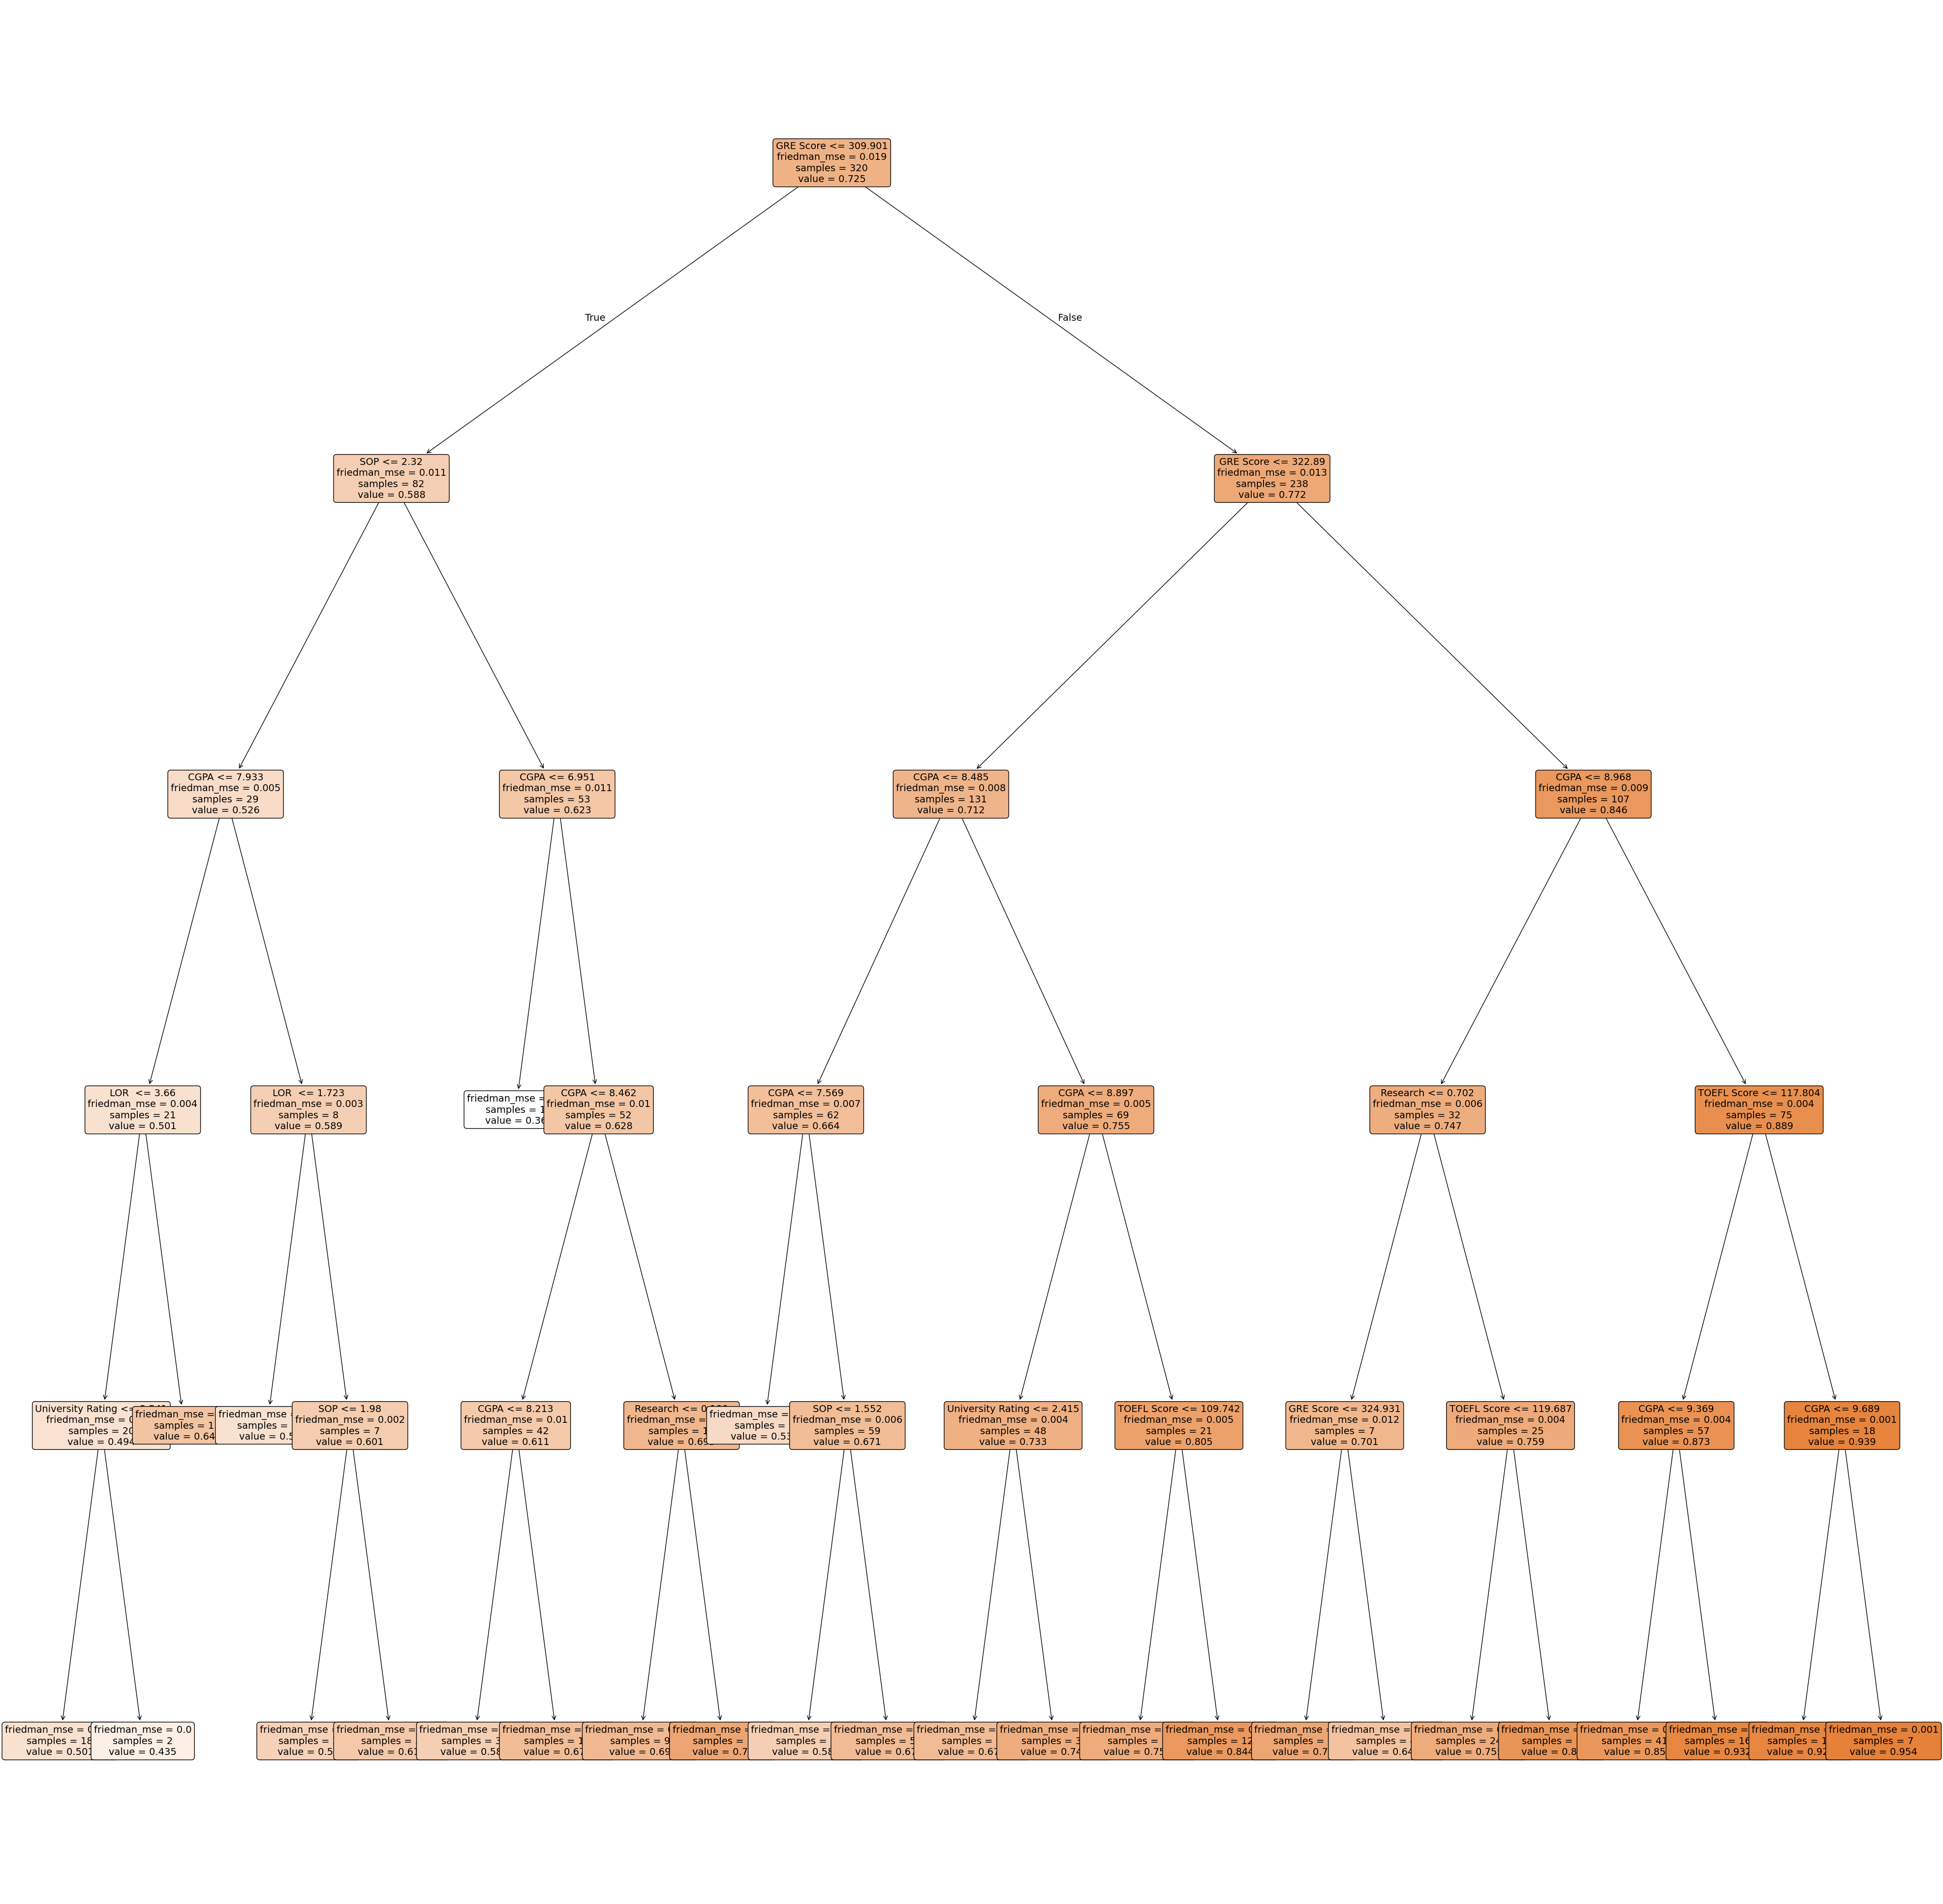

In [52]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(50,50))
a = plot_tree(best_model,
              feature_names=x.columns, #???
              class_names=y, #??
              filled=True,
              rounded=True,
              fontsize=14)

**Prediction With Linear Regression and Dession tree.**

In [53]:
import numpy as np
print("--------------------Prediction with LR----------------------------------------------")
c=np.array([.5,.3,.58,.68,.98,.78,1]).reshape(1, -1)
b=multiple_linear_regression.predict(c)
print(b)
print("--------------------Prediction with DT----------------------------------------------")
b1=best_model.predict(c)
print(b1)

--------------------Prediction with LR----------------------------------------------
[[-1.0972817]]
--------------------Prediction with DT----------------------------------------------
[0.50111111]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


**Random Forest Regression Librar**

> n_estimators = 100 (Tree number)
 random_state = 42  (Sample number)



In [54]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(n_estimators = 100, random_state = 42)
random_forest_reg.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [55]:
y_rf=random_forest_reg.predict(x_test)
y_rf

array([0.6652, 0.7245, 0.9401, 0.8184, 0.5838, 0.9179, 0.5767, 0.4608,
       0.6788, 0.9065, 0.723 , 0.9394, 0.5179, 0.8991, 0.7219, 0.6711,
       0.7106, 0.4725, 0.7084, 0.9599, 0.6182, 0.6773, 0.7045, 0.5529,
       0.9441, 0.7998, 0.7313, 0.5765, 0.7095, 0.8072, 0.804 , 0.9429,
       0.6367, 0.4574, 0.7052, 0.6672, 0.7   , 0.6893, 0.632 , 0.9235,
       0.7489, 0.6423, 0.7598, 0.9492, 0.8791, 0.8403, 0.9645, 0.6548,
       0.9336, 0.8943, 0.9103, 0.7079, 0.7675, 0.9437, 0.5714, 0.5915,
       0.6902, 0.8427, 0.5731, 0.8762, 0.6411, 0.6468, 0.6788, 0.4532,
       0.6756, 0.6435, 0.6094, 0.8608, 0.8849, 0.7742, 0.6967, 0.821 ,
       0.9223, 0.8596, 0.5443, 0.7359, 0.6915, 0.5482, 0.8419, 0.7722])

In [56]:
print("--------------------Result for RF----------------------------------------------")
print("MSE for DT:", mean_squared_error(y_test, y_rf))
print("RMSE for DT:", np.sqrt(mean_squared_error(y_test, y_rf)))
print("MAE for DT:", mean_absolute_error(y_test, y_rf))
print("R² Score for DT:", r2_score(y_test, y_rf))

--------------------Result for RF----------------------------------------------
MSE for DT: 0.004994038499999999
RMSE for DT: 0.07066851137529359
MAE for DT: 0.04977500000000004
R² Score for DT: 0.8066077140670239


**Evaluting.**

In [58]:
print("--------------------Result for LR----------------------------------------------")
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("--------------------Result for DT not tuned----------------------------------------------")
print("MSE for DT:", mean_squared_error(y_test, y_head_dtr))
print("RMSE for DT:", np.sqrt(mean_squared_error(y_test, y_head_dtr)))
print("MAE for DT:", mean_absolute_error(y_test, y_head_dtr))
print("R² Score for DT:", r2_score(y_test, y_head_dtr))
print("--------------------Result for DT tuned----------------------------------------------")
best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test Score (R2):", test_score)
print("--------------------Result for RF not tuned----------------------------------------------")
print("MSE for DT:", mean_squared_error(y_test, y_rf))
print("RMSE for DT:", np.sqrt(mean_squared_error(y_test, y_rf)))
print("MAE for DT:", mean_absolute_error(y_test, y_rf))
print("R² Score for DT:", r2_score(y_test, y_rf))

--------------------Result for LR----------------------------------------------
MSE: 0.004617003377285005
RMSE: 0.06794853476922813
MAE: 0.047956733620911976
R² Score: 0.8212082591486993
--------------------Result for DT not tuned----------------------------------------------
MSE for DT: 0.009395
RMSE for DT: 0.09692780818733085
MAE for DT: 0.06475000000000002
R² Score for DT: 0.6361821146672555
--------------------Result for DT tuned----------------------------------------------
Test Score (R2): 0.7155599152989289
--------------------Result for RF not tuned----------------------------------------------
MSE for DT: 0.004994038499999999
RMSE for DT: 0.07066851137529359
MAE for DT: 0.04977500000000004
R² Score for DT: 0.8066077140670239


**Evaluate**

In [59]:
print("--------------------Result for LR----------------------------------------------")

print("R² Score:", r2_score(y_test, y_pred))
print("--------------------Result for DT not tuned----------------------------------------------")

print("R² Score for DT:", r2_score(y_test, y_head_dtr))
print("--------------------Result for DT tuned----------------------------------------------")
best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test Score (R2) for yuned DT :", test_score)

print("--------------------Result for RF not tuned----------------------------------------------")

print("R² Score for RF:", r2_score(y_test, y_rf))

--------------------Result for LR----------------------------------------------
R² Score: 0.8212082591486993
--------------------Result for DT not tuned----------------------------------------------
R² Score for DT: 0.6361821146672555
--------------------Result for DT tuned----------------------------------------------
Test Score (R2) for yuned DT : 0.7155599152989289
--------------------Result for RF not tuned----------------------------------------------
R² Score for RF: 0.8066077140670239


In [60]:
import numpy as np
print("--------------------Prediction with LR----------------------------------------------")
c=np.array([.5,.3,.58,.68,.98,.78,1]).reshape(1, -1)
b=multiple_linear_regression.predict(c)
print(b)
print("--------------------Prediction with DT best parameters----------------------------------------------")
b1=best_model.predict(c)
print(b1)
print("--------------------Prediction with rf without tuning----------------------------------------------")
b2=random_forest_reg.predict(c)
print(b2)

--------------------Prediction with LR----------------------------------------------
[[-1.0972817]]
--------------------Prediction with DT best parameters----------------------------------------------
[0.50111111]
--------------------Prediction with rf without tuning----------------------------------------------
[0.4408]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


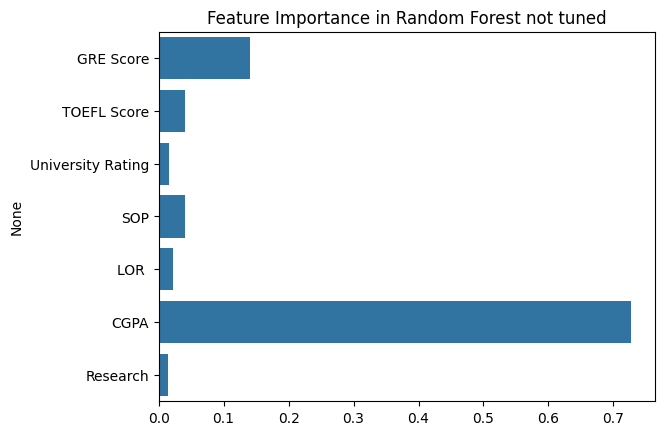

In [61]:
import seaborn as sns

# Get feature importance scores
importances = random_forest_reg.feature_importances_
feature_names = x.columns

# Plot feature importance
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance in Random Forest not tuned")
plt.show()

In [62]:
from sklearn.ensemble import RandomForestRegressor

random_forest_reg1 = RandomForestRegressor(n_estimators = 900, random_state = 42,max_depth=35, min_samples_split=20 )
# n_estimators = 900 --> Tree number
# random_state = 42  --> Sample number
random_forest_reg1.fit(x_train,y_train)
y_rf1=random_forest_reg1.predict(x_test)
print("--------------------Result for RF  tuned----------------------------------------------")

print("R² Score for RF:", r2_score(y_test, y_rf1))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


--------------------Result for RF  tuned----------------------------------------------
R² Score for RF: 0.8172557171306373


**Evaluate**

In [63]:
print("--------------------Result for LR----------------------------------------------")

print("R² Score:", r2_score(y_test, y_pred))
print("--------------------Result for DT not tuned----------------------------------------------")

print("R² Score for DT:", r2_score(y_test, y_head_dtr))
print("--------------------Result for DT tuned----------------------------------------------")
best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test Score (R2) for yuned DT :", test_score)

print("--------------------Result for RF not tuned----------------------------------------------")

print("R² Score for RF:", r2_score(y_test, y_rf))
print("--------------------Result for RF tuned----------------------------------------------")

print("R² Score for RF:", r2_score(y_test, y_rf1))

--------------------Result for LR----------------------------------------------
R² Score: 0.8212082591486993
--------------------Result for DT not tuned----------------------------------------------
R² Score for DT: 0.6361821146672555
--------------------Result for DT tuned----------------------------------------------
Test Score (R2) for yuned DT : 0.7155599152989289
--------------------Result for RF not tuned----------------------------------------------
R² Score for RF: 0.8066077140670239
--------------------Result for RF tuned----------------------------------------------
R² Score for RF: 0.8172557171306373


**Checking Feature Importance in Random Forest tuned.**

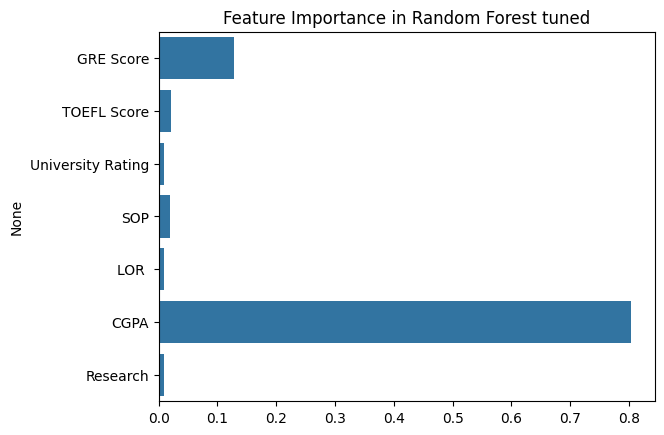

In [64]:
import seaborn as sns

# Get feature importance scores
importances = random_forest_reg1.feature_importances_
feature_names = x.columns

# Plot feature importance
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance in Random Forest tuned")
plt.show()

**Random forest tuned is the best model CPGA and TOFL score have the hightes impact to make an accurate predcition.**

In [65]:
print("--------------------Prediction with rf without tuning----------------------------------------------")
c=np.array([.5,.3,.58,.68,.98,.78,1]).reshape(1, -1)
b3=random_forest_reg1.predict(c)
print(b3)

--------------------Prediction with rf without tuning----------------------------------------------
[0.47711632]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Random Forest Regressor Tuning with RandomizedSearchCV
We use `RandomizedSearchCV` instead of `GridSearchCV` because it is more efficient when dealing with many hyperparameters or large datasets.
It samples a fixed number of hyperparameter settings from specified ranges, which saves time while still finding a near-optimal solution.

**` Split dataset`**

In [66]:
X = df.drop(["Chance of Admit "], axis=1)
y = df["Chance of Admit "]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Random Forest Regressor**

In [67]:
rf = RandomForestRegressor(random_state=42)

**Define hyperparameter grid**

In [68]:
param_dist = {
    "n_estimators": randint(50, 300),
    "max_depth": randint(3, 30),
    "min_samples_split": randint(2, 10),
    "min_samples_leaf": randint(1, 10),
    "max_features": ["auto", "sqrt", "log2"]
}


**Randomized Search**

In [70]:
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=2,
    random_state=42,
    n_jobs=-1
)
rf_random.fit(X_train, y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
90 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
67 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7df7e0434250>,
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7df7e0341390>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7df7e05eb110>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7df7d6b24190>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

**Best model and its performance**

In [71]:
best_rf = rf_random.best_estimator_
y_pred_rf = best_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Best Random Forest Model MSE:", mse_rf)
print("Best Parameters:", rf_random.best_params_)

Best Random Forest Model MSE: 0.004876094766930361
Best Parameters: {'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 93}


**Decision Tree Regressor Tuning.**

In [72]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeRegressor(random_state=42)

param_grid = {
    "max_depth": [3, 5, 10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid_search_dt = GridSearchCV(dt, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error', verbose=2)

**Best model and its performance**

In [73]:
best_dt = grid_search_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)

from sklearn.metrics import mean_squared_error
print("Best Decision Tree MSE:", mean_squared_error(y_test, y_pred_dt))
print("Best Parameters:", grid_search_dt.best_params_)

Best Decision Tree MSE: 0.005284783142405122
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}


**Feature Selection Using Random Forest Importances**

In [74]:
importances = pd.Series(best_rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(5).index
print("Top 5 Features:", top_features.tolist())

Top 5 Features: ['CGPA', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP']


**Use only top 5 features**

In [75]:
X_reduced = X[top_features]
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

**Retrain models**

In [76]:
best_rf.fit(X_train_r, y_train_r)
rf_r_pred = best_rf.predict(X_test_r)

**Best model and its performance**

In [ ]:
best_dt.fit(X_train_r, y_train_r)
dt_r_pred = best_dt.predict(X_test_r)

print("Random Forest (Top 5) MSE:", mean_squared_error(y_test_r, rf_r_pred))
print("Decision Tree (Top 5) MSE:", mean_squared_error(y_test_r, dt_r_pred))

**Handle Multicollinearity in Linear Regression**

Multicollinearity can distort the effect of each feature on the outcome

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LinearRegression

X_vif = add_constant(X)
vif = pd.DataFrame()
vif["Feature"] = X_vif.columns
vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print(vif)

             Feature          VIF
0              const  1529.672661
1          GRE Score     4.615516
2        TOEFL Score     4.288959
3  University Rating     2.919606
4                SOP     3.075504
5               LOR      2.431258
6               CGPA     5.207403
7           Research     1.543312


**Drop features with VIF  10**

In [78]:
to_drop = vif[vif["VIF"] > 10]["Feature"].tolist()
X_vif_filtered = X.drop(columns=[f for f in to_drop if f != 'const'])

X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_vif_filtered, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train_l, y_train_l)
lr_pred = lr.predict(X_test_l)
print("Linear Regression MSE after VIF filtering:", mean_squared_error(y_test_l, lr_pred))

Linear Regression MSE after VIF filtering: 0.004617003377285005
